In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler

2023-01-24 16:31:48.975602: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv("AirPassengers.csv")
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
df.rename(columns={"#Passengers":"passengers"}, inplace=True)
df

,Month,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
df = df["passengers"]
df

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: passengers, Length: 144, dtype: int64

In [5]:
df = np.array(df).reshape(-1,1)

In [6]:
df

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

In [7]:
type(df)

numpy.ndarray

<function matplotlib.pyplot.show(close=None, block=None)>

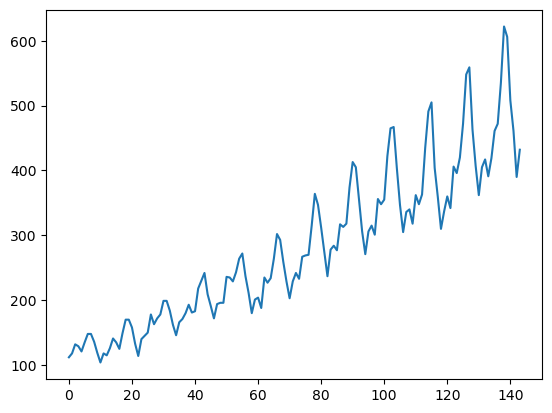

In [8]:
plt.plot(df)
plt.show

In [9]:
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [10]:
len(df)

144

In [11]:
train = df[0:100,:]
test = df[100:,:]

In [12]:
def get_df(df, stepSize):
    dataX = []
    dataY = []
    for i in range(len(df)-stepSize-1):
        a = df[i:(i+stepSize), 0]
        dataX.append(a)
        dataY.append(df[i+stepSize, 0])
    return np.array(dataX), np.array(dataY)

In [67]:
stepSize = 2

In [68]:
x_train, y_train = get_df(train, stepSize)
x_test, y_test = get_df(test, stepSize)

In [69]:
x_train

array([[0.01544402, 0.02702703],
       [0.02702703, 0.05405405],
       [0.05405405, 0.04826255],
       [0.04826255, 0.03281853],
       [0.03281853, 0.05984556],
       [0.05984556, 0.08494208],
       [0.08494208, 0.08494208],
       [0.08494208, 0.06177606],
       [0.06177606, 0.02895753],
       [0.02895753, 0.        ],
       [0.        , 0.02702703],
       [0.02702703, 0.02123552],
       [0.02123552, 0.04247104],
       [0.04247104, 0.07142857],
       [0.07142857, 0.05984556],
       [0.05984556, 0.04054054],
       [0.04054054, 0.08687259],
       [0.08687259, 0.12741313],
       [0.12741313, 0.12741313],
       [0.12741313, 0.1042471 ],
       [0.1042471 , 0.05598456],
       [0.05598456, 0.01930502],
       [0.01930502, 0.06949807],
       [0.06949807, 0.07915058],
       [0.07915058, 0.08880309],
       [0.08880309, 0.14285714],
       [0.14285714, 0.11389961],
       [0.11389961, 0.13127413],
       [0.13127413, 0.14285714],
       [0.14285714, 0.18339768],
       [0.

In [70]:
x_train = np.reshape(x_train, (x_train.shape[0],1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0],1, x_test.shape[1]))
x_train

array([[[0.01544402, 0.02702703]],

       [[0.02702703, 0.05405405]],

       [[0.05405405, 0.04826255]],

       [[0.04826255, 0.03281853]],

       [[0.03281853, 0.05984556]],

       [[0.05984556, 0.08494208]],

       [[0.08494208, 0.08494208]],

       [[0.08494208, 0.06177606]],

       [[0.06177606, 0.02895753]],

       [[0.02895753, 0.        ]],

       [[0.        , 0.02702703]],

       [[0.02702703, 0.02123552]],

       [[0.02123552, 0.04247104]],

       [[0.04247104, 0.07142857]],

       [[0.07142857, 0.05984556]],

       [[0.05984556, 0.04054054]],

       [[0.04054054, 0.08687259]],

       [[0.08687259, 0.12741313]],

       [[0.12741313, 0.12741313]],

       [[0.12741313, 0.1042471 ]],

       [[0.1042471 , 0.05598456]],

       [[0.05598456, 0.01930502]],

       [[0.01930502, 0.06949807]],

       [[0.06949807, 0.07915058]],

       [[0.07915058, 0.08880309]],

       [[0.08880309, 0.14285714]],

       [[0.14285714, 0.11389961]],

       [[0.11389961, 0.13127

In [71]:
x_test

array([[[0.48455598, 0.61389961]],

       [[0.61389961, 0.6969112 ]],

       [[0.6969112 , 0.7007722 ]],

       [[0.7007722 , 0.57915058]],

       [[0.57915058, 0.46911197]],

       [[0.46911197, 0.38803089]],

       [[0.38803089, 0.44787645]],

       [[0.44787645, 0.45559846]],

       [[0.45559846, 0.41312741]],

       [[0.41312741, 0.4980695 ]],

       [[0.4980695 , 0.47104247]],

       [[0.47104247, 0.5       ]],

       [[0.5       , 0.63899614]],

       [[0.63899614, 0.74710425]],

       [[0.74710425, 0.77413127]],

       [[0.77413127, 0.57915058]],

       [[0.57915058, 0.49227799]],

       [[0.49227799, 0.3976834 ]],

       [[0.3976834 , 0.44980695]],

       [[0.44980695, 0.49420849]],

       [[0.49420849, 0.45945946]],

       [[0.45945946, 0.58301158]],

       [[0.58301158, 0.56370656]],

       [[0.56370656, 0.61003861]],

       [[0.61003861, 0.71042471]],

       [[0.71042471, 0.85714286]],

       [[0.85714286, 0.87837838]],

       [[0.87837838, 0.69305

In [72]:
model = Sequential()
model.add(LSTM(128, input_shape=(1, stepSize)))
model.add(Dense(64))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer = "adam")

In [73]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 128)               67072     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 75,393
Trainable params: 75,393
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.fit(x_train, y_train, epochs=25, batch_size=1)

Epoch 1/25
97/97 [==============================] - 2s 2ms/step - loss: 0.0093
Epoch 2/25
97/97 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 3/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 4/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 5/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 6/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 7/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 8/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 9/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 10/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 11/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 12/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 13/25
97/97 [==============================

In [75]:
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 4ms/step


In [76]:
y_pred = scaler.inverse_transform(y_pred)

In [77]:
y_test = y_test.reshape(-1,1)

In [78]:
y_test = scaler.inverse_transform(y_test)

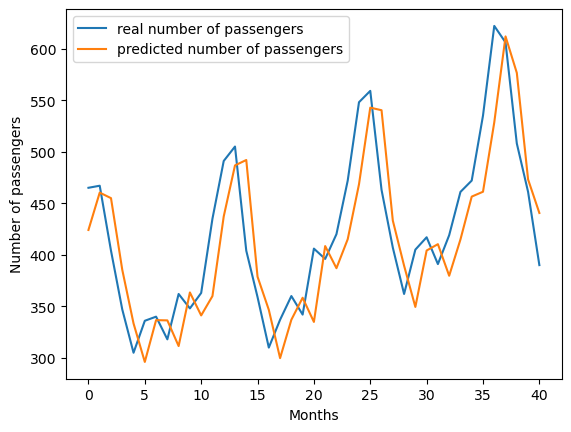

In [79]:
plt.plot(y_test, label = 'real number of passengers')
plt.plot(y_pred, label = 'predicted number of passengers')
plt.xlabel('Months')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()